In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


In [2]:
DATASET_DIR = "dataset"     # Use clean English path
IMAGE_SIZE = (128, 128)         # Smaller size for DNN
BATCH_SIZE = 32
EPOCHS = 10


In [3]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    DATASET_DIR,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
num_classes = len(class_names)

print("Classes:", class_names)


Found 435 files belonging to 4 classes.
Using 348 files for training.
Found 435 files belonging to 4 classes.
Using 87 files for validation.
Classes: ['ary_news', 'express_news', 'geo_news', 'samaa_news']


In [4]:
normalization_layer = layers.Rescaling(1./255)


In [5]:
model = models.Sequential([

    # Normalize pixel values
    normalization_layer,

    # Flatten image (VERY IMPORTANT for DNN)
    layers.Flatten(input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),

    # Fully Connected Layers
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),

    layers.Dense(256, activation="relu"),
    layers.Dropout(0.5),

    # Output Layer
    layers.Dense(num_classes, activation="softmax")
])


c:\Users\USER\miniconda3\envs\env_deep_learning\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)


In [7]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS
)


Epoch 1/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 7s 433ms/step - accuracy: 0.3100 - loss: 16.9942 - val_accuracy: 0.4253 - val_loss: 3.9327
Epoch 2/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 321ms/step - accuracy: 0.3805 - loss: 16.9459 - val_accuracy: 0.6207 - val_loss: 2.7169
Epoch 3/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 331ms/step - accuracy: 0.5208 - loss: 8.1091 - val_accuracy: 0.8736 - val_loss: 0.3219
Epoch 4/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.7792 - loss: 1.5489 - val_accuracy: 0.9770 - val_loss: 0.0712
Epoch 5/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.8290 - loss: 0.6927 - val_accuracy: 0.9885 - val_loss: 0.0708
Epoch 6/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 320ms/step - accuracy: 0.8301 - loss: 0.7192 - val_accuracy: 0.9770 - val_loss: 0.0503
Epoch 7/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 310ms/step - accuracy: 0.9086 - loss: 0.3106 - val_accuracy: 1.0000 - val_loss: 0.0184
Epoch 8/10
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.8738 - loss: 0.4215 - val_accuracy: 

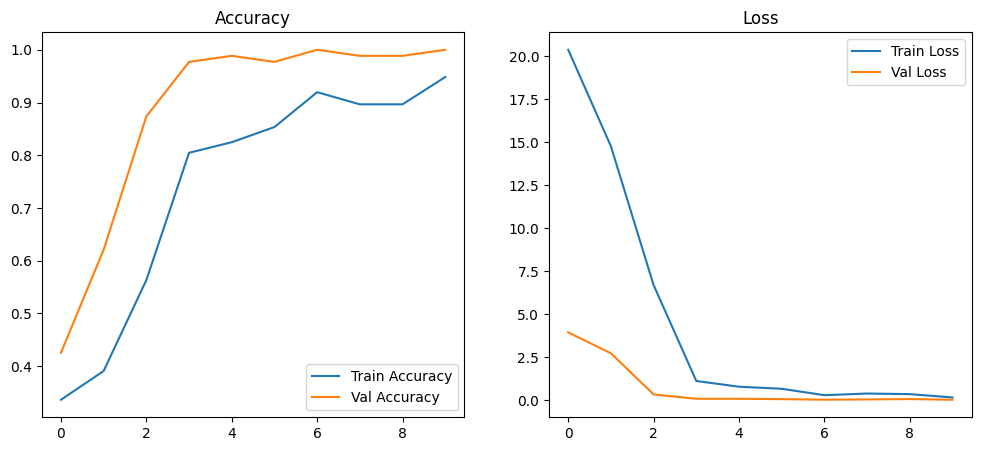

In [8]:
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Val Accuracy")
plt.legend()
plt.title("Accuracy")

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Val Loss")
plt.legend()
plt.title("Loss")

plt.show()
